# Google Colab demo

To enable GPU:
Runtime -> Change runtime type -> GPU

In [1]:
! pip install onnxruntime
! pip install openvino
! pip install huggingface_hub

! git clone https://github.com/ai-forever/SEGM-model.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 31.4 MB/s eta 0:00:00
Cloning into 'SEGM-model'...
remote: Enumerating objects: 472, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 472 (delta 98), reused 97 (delta 49), pack-reused 312
Receiving objects: 100% (472/472), 103.34 KiB | 2.07 MiB/s, done.
Resolving deltas: 100% (311/311), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [7]:
!pip cache purge
!python -m pip install --upgrade pip
!python -m pip install --upgrade setuptools
!pip3 install wheel setuptools pip --upgrade
!pip install numpy --use-deprecated=legacy-resolver

Files removed: 67
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [10]:
import sys
sys.path.append('SEGM-model/')

#!pip install -r SEGM-model/requirements.txt

import cv2
from matplotlib import pyplot as plt
import numpy as np

from huggingface_hub import hf_hub_download

from segm.predictor import SegmPredictor

In [108]:
repo_id = "ai-forever/ReadingPipeline-notebooks"

IMG_PATH = "/content/download (1).png"#hf_hub_download(repo_id, "0_0.jpg")

MODEL_PATH = hf_hub_download(repo_id, "segm/segm_model.ckpt")
CONFIG_PATH = hf_hub_download(repo_id, "segm/segm_config.json")

NUM_THREADS = 8

DEVICE = 'cuda'

RUNTIME = 'Pytorch'

In [109]:
predictor = SegmPredictor(
    model_path=MODEL_PATH,
    config_path="/content/config.json",
    num_threads=NUM_THREADS,
    device=DEVICE,
    runtime=RUNTIME
)

In [110]:
image = cv2.imread(IMG_PATH)

pred_data = predictor([image])

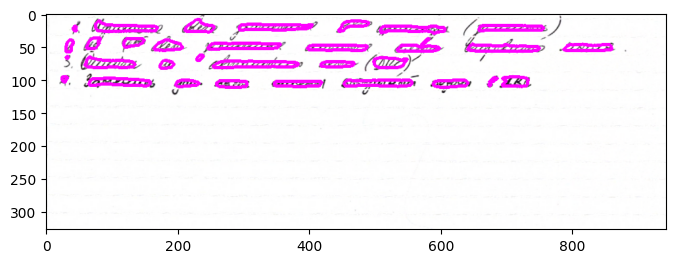

In [111]:
pred_img = pred_data[0]

image = cv2.imread(IMG_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
for prediction in pred_img['predictions']:
    if prediction['class_name'] == 'shrinked_text':
      contour = prediction['polygon']
      cv2.drawContours(image, np.array([contour]), -1, (255, 0, 255), 3)

plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.show()